# Task 1

### Generate a generic 2D Gaussian-like array (Hint: checkout np.linspace function). Visualize the results.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy as sp
from scipy import sparse

In [3]:
x = np.linspace(-3, 3, num=10000)
f = np.vectorize(norm.pdf)
normal_x = f(x)

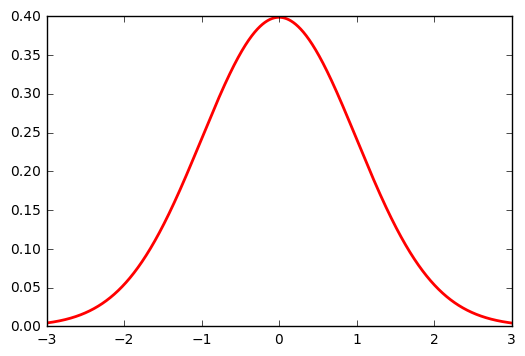

In [4]:
plt.plot(x.reshape(len(x), 1), normal_x.reshape(len(normal_x), 1),  linewidth=2, color='r')
plt.show()

### How to tell if a given 2D array has null columns?

In [5]:
def contains_null_columns(arr):
    is_nan = np.isnan(x.transpose())
    acc = np.multiply.reduce(is_nan)
    res, = np.nonzero(acc)
    return True if res.size > 0 else False

# exaple
x = np.random.randn(15, 5)
x[1] = np.nan
print(contains_null_columns(x))

False


### Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?

In [6]:
x = np.array([1, 2, 3, 4, 5])
y = x - 1
indexes = np.repeat(y, 3)
np.insert(x, indexes, 0)

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 5])

### Considering a 15x5 matrix, extract rows with unequal values (e.g. [1,2,2,3,4]).

In [ ]:
# sample array
x = np.random.randn(15, 5)
indexes_map = np.apply_along_axis(lambda row: np.unique(row).size == y[0].size, 1, y)
res = x[indexes_map] # result

### Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

In [7]:
x = np.random.randn(2)
y = np.random.randn(3)
z = np.random.randn(2, 3)

# two arrays
np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

array([[ 2.06159365,  0.35172837],
       [-0.92844417,  0.35172837],
       [ 2.06159365, -0.51381606],
       [-0.92844417, -0.51381606],
       [ 2.06159365, -1.5832321 ],
       [-0.92844417, -1.5832321 ]])

In [9]:
# many arrays
def cartesian(arrays, out=None):
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out
cartesian((x, y, z))

### Consider a random vector with shape (100,2) representing coordinates, find point by point distances. 

In [10]:
z = np.random.randn(6, 2)
print(z)
a = np.tile(z, (z.shape[0], 1))
b = np.repeat(z, z.shape[0], axis=0)

print(np.linalg.norm(a - b, axis=1))

[[ 0.83176324 -0.64256512]
 [-0.77100483  1.48151166]
 [-0.38753064 -1.69466632]
 [-0.71529225  1.21123801]
 [-0.69904209  1.39942063]
 [-1.15035921  0.12268514]]
[ 0.          2.6609336   1.61046406  2.41453241  2.55207186  2.12471583
  2.6609336   0.          3.1992435   0.27595604  0.10916763  1.41078675
  1.61046406  3.1992435   0.          2.92433029  3.10972884  1.97095757
  2.41453241  0.27595604  2.92433029  0.          0.18888295  1.17227582
  2.55207186  0.10916763  3.10972884  0.18888295  0.          1.35415681
  2.12471583  1.41078675  1.97095757  1.17227582  1.35415681  0.        ]


# Task 2

## 1. Provide basic statistics about the collection (e.g. the minimal, maximal and average number of words in a text and etc).

In [3]:
# # of texts
# index of word
# # of records

with open("./res/docword.kos.txt", 'r') as file:
    num_texts = int(file.readline().strip('\n'))
    num_words = int(file.readline().strip('\n'))
    num_records = int(file.readline().strip('\n'))
    texts = []
    words = []
    values = []
    for text_id, word_id, val in (map(int, line.strip('\n').split()) for line in file.readlines()):
        texts.append(text_id - 1)
        words.append(word_id - 1)
        values.append(val)

In [6]:
row = np.array(texts)
col = np.array(words)
data = np.array(values)
mtx = sparse.coo_matrix((data, (row, col)), shape=(num_texts, num_words))

In [ ]:
# stats
text_to_words = mtx.sum(axis=0)
print(text_to_words.min())
print(text_to_words.max())
print(text_to_words.mean())

## 2. Create a function, which allows to build a histogram of the N most frequent words in selected text.

In [7]:
def n_most_freq(mtx, row_index, N):
    row = mtx.getrow(row_index)
    row = np.squeeze(row.toarray())
    ind = np.argpartition(row, -N)[-N:]
    hist, bin_edges = np.histogram(row[ind])
    plt.bar(bin_edges[:-1], hist, width = 0.8)
    plt.xlabel('# of word occurences in text')
    plt.ylabel('# of words')
    plt.show()

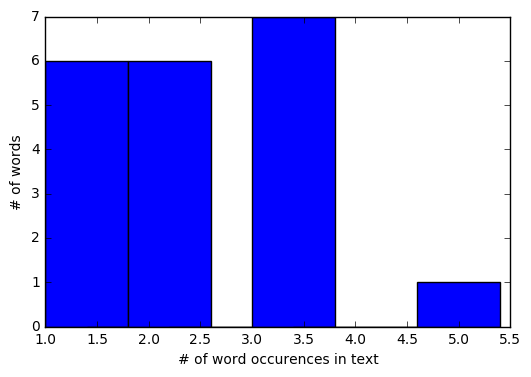

In [8]:
n_most_freq(mtx, 10, 20)

## 3. Create f function, which allows to build a scatter plot of the N most frequent words against the files, where they can be found

In [9]:
def scatter_plot_freqs(mtx, N):
    words_occ = mtx.sum(axis=0)  # words occurrences
    words_occ_arr = np.squeeze(words_occ.A1)
    indexes = np.argpartition(words_occ_arr, -N)[-N:]  # indexes of N words with highest occurrences
    y = np.array([])
    repeat_num = []
    texts_info = mtx.tocsr().T[indexes]  # all texts -> # of occurrences of words with chosen indexes
    for i in range(len(indexes)):
        text_indexes = texts_info[i:i + 1].nonzero()[1]
        repeat_num.append(text_indexes.size)
        y = np.append(y, text_indexes)
    x = np.repeat(indexes, repeat_num)
    plt.scatter(x, y, s=0.01)
    plt.xlabel('indexes of words')
    plt.ylabel('texts in which word occures')
    plt.show()

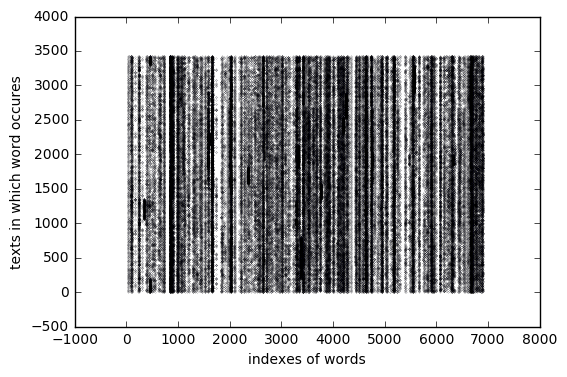

In [10]:
scatter_plot_freqs(mtx, 500)

## My misunderstandings about HW:
1. I didn't  really understand what was the point to use the sparse matrices because in the end I used reduction to ordinary matrix represantation
2. Did I understand the task 2 and 3 right? Text - word - occurrences. If so what is 'file'?
3. What does 'Create a function, **which allows** to build a ...' mean? It means that we should build it in a function (which I did) or we should return it in some format? If 'format' - I don't really understand which format should it be.